<a href="https://colab.research.google.com/github/KishorKaphle/100-Days-ML-Challenge/blob/master/Persistenct_Length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installation of dependencies

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-4.6.14-Linux-x86_64.sh 
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local -c conda-forge mdanalysis
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

!conda install -c conda-forge MDAnalysisTests

--2021-04-07 18:35:58--  https://repo.anaconda.com/miniconda/Miniconda3-4.6.14-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70348401 (67M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  67.09M  8.30MB/s    in 8.4s    

2021-04-07 18:36:07 (8.03 MB/s) - ‘mini.sh’ saved [70348401/70348401]

PREFIX=/usr/local
reinstalling: python-3.7.3-h0371630_0 ...
using -f (force) option
Python 3.7.3
reinstalling: ca-certificates-2019.1.23-0 ...
using -f (force) option
reinstalling: libgcc-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
reinstalling: libstdcxx-ng-8.2.0-hdf63c60_1 ...
using -f (force) option
reinstalling: libffi-3.2.1-hd88cf55_4 ...
using -f (force) option
reinstalling: ncurses-6.1-he6710b0_1 ...
using -f (force) option
reinstalling: 

Calculation of persistence length

<AtomGroup [<Atom 1: C of type C of resname UNK, resid 1 and segid MOL>, <Atom 2: C of type C of resname UNK, resid 2 and segid MOL>, <Atom 3: C of type CT of resname UNK, resid 3 and segid MOL>, ..., <Atom 95627: OH2 of type OW of resname TIP, resid 638 and segid MOL>, <Atom 95628: H1 of type HT of resname TIP, resid 638 and segid MOL>, <Atom 95629: H2 of type HT of resname TIP, resid 638 and segid MOL>]>
<AtomGroup [<Atom 1: C of type C of resname UNK, resid 1 and segid MOL>, <Atom 2: C of type C of resname UNK, resid 2 and segid MOL>, <Atom 3: C of type CT of resname UNK, resid 3 and segid MOL>, ..., <Atom 2661: C of type CT of resname UNK, resid 799 and segid MOL>, <Atom 2662: C of type CT of resname UNK, resid 800 and segid MOL>, <Atom 2664: C of type CT of resname UNK, resid 802 and segid MOL>]>
<AtomGroup [<Atom 3726: H1 of type HT of resname TIP, resid 1 and segid MOL>, <Atom 3729: H1 of type HT of resname TIP, resid 2 and segid MOL>, <Atom 3732: H1 of type HT of resname TIP, r

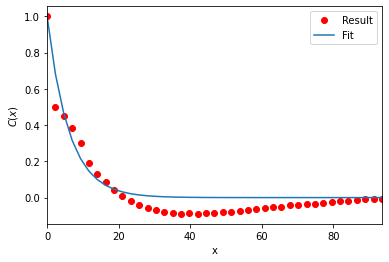

In [ ]:
import MDAnalysis as mda
from MDAnalysis.analysis import polymer

#loading data files
u = mda.Universe('/content/S10_UW2M.psf', '/content/S10_UW2M_dyn.dcd')

#selecting polymer backbone and water from the loaded database
PolymerBackbone = u.select_atoms('name C' or 'type O*C')
water = u.select_atoms('name H1' or 'name H2' or 'name OH*')

#verifying the atoms of polymer and water
print(u.atoms)
print(PolymerBackbone.atoms)
print(water.atoms)

#calculation of persistent length
PL = polymer.PersistenceLength([PolymerBackbone])
PL.run()

# PL.perform_fit()
PL.plot()
print('\nPersistence length is:', PL.lp, 'unit\n')

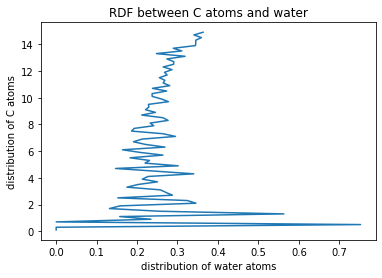

In [ ]:
#importing required libraries
import MDAnalysis as mda
import numpy as np
import MDAnalysis.analysis.rdf
import matplotlib.pyplot as plt

#loading dataset
u = mda.Universe('/content/S10_UW2M.pdb', '/content/S10_UW2M_dyn.dcd')

class CG:
  def __init__(self, ag):
    self.ag = ag
    self.universe = self.ag.universe
    self.trajectory = self.ag.universe.trajectory

  @property
  def positions(self):
    return np.array([self.ag.center_of_geometry()])

  def __len__(self):
    return 1

#subject selection for RDF computation
cg_selection = u.select_atoms('name C')
cg_atom = CG(cg_selection.atoms)
water = u.select_atoms('name H1' or 'name H2' or 'name OH*')

#computation of RDF
rdf = MDAnalysis.analysis.rdf.InterRDF(cg_atom, water)
rdf.run()

#Display
plt.plot(rdf.rdf, rdf.bins,)
plt.title('RDF between C atoms and water')
plt.ylabel('distribution of C atoms')
plt.xlabel('distribution of water atoms')
plt.show()